Fonte dos dados: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

# Importando os dados e as bibliotecas

In [35]:
# pip install category_encoders

In [36]:
# pip install catboost

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from category_encoders import TargetEncoder, CatBoostEncoder
from xgboost import XGBRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    GridSearchCV,
    RandomizedSearchCV
)
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, make_scorer

In [38]:
!wget https://raw.githubusercontent.com/lhayana/flight-price-prediction/refs/heads/main/data/Clean_Dataset.csv

--2024-10-24 14:00:53--  https://raw.githubusercontent.com/lhayana/flight-price-prediction/refs/heads/main/data/Clean_Dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24683279 (24M) [text/plain]
Saving to: ‘Clean_Dataset.csv.4’

Clean_Dataset.csv.4 100%[===================>]  23.54M   155MB/s    in 0.2s    

2024-10-24 14:00:53 (155 MB/s) - ‘Clean_Dataset.csv.4’ saved [24683279/24683279]



In [39]:
data = pd.read_csv('Clean_Dataset.csv', index_col=0)

In [40]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [41]:
data['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

# Análise exploratória

In [42]:
sns.set(style="whitegrid")

<ipython-input-43-09caffa5c07a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='airline', data=data, order=airline_order, palette='hls')


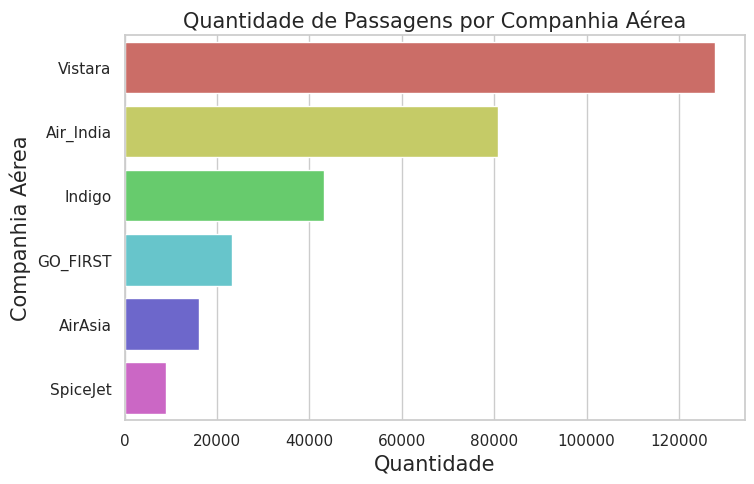

In [43]:
plt.figure(figsize=(8,5))
airline_order = data['airline'].value_counts().index
sns.countplot(y='airline', data=data, order=airline_order, palette='hls')
plt.title('Quantidade de Passagens por Companhia Aérea', fontsize=15)
plt.xlabel('Quantidade', fontsize=15)
plt.ylabel('Companhia Aérea', fontsize=15)
plt.show()

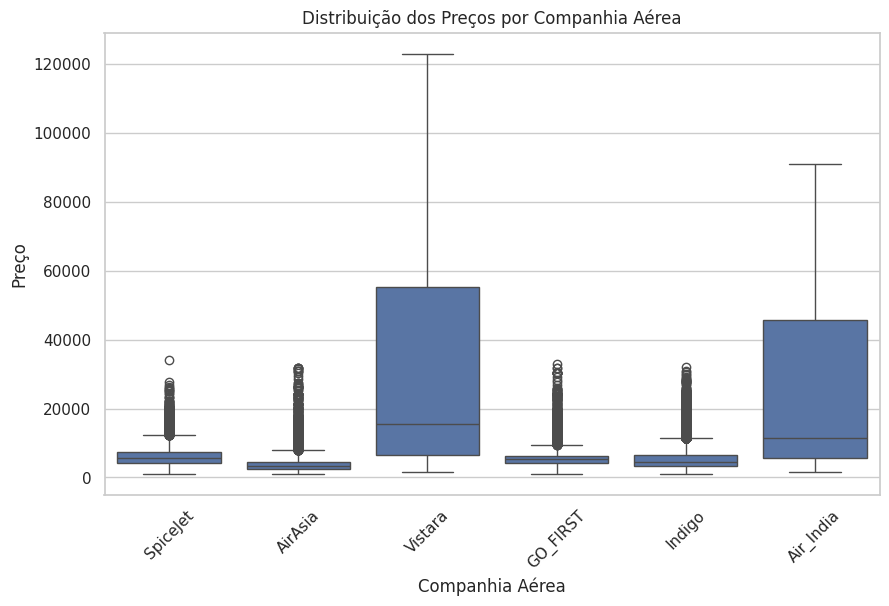

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='airline', y='price', data=data)
plt.title('Distribuição dos Preços por Companhia Aérea')
plt.xlabel('Companhia Aérea')
plt.ylabel('Preço')
plt.xticks(rotation=45)
plt.show()

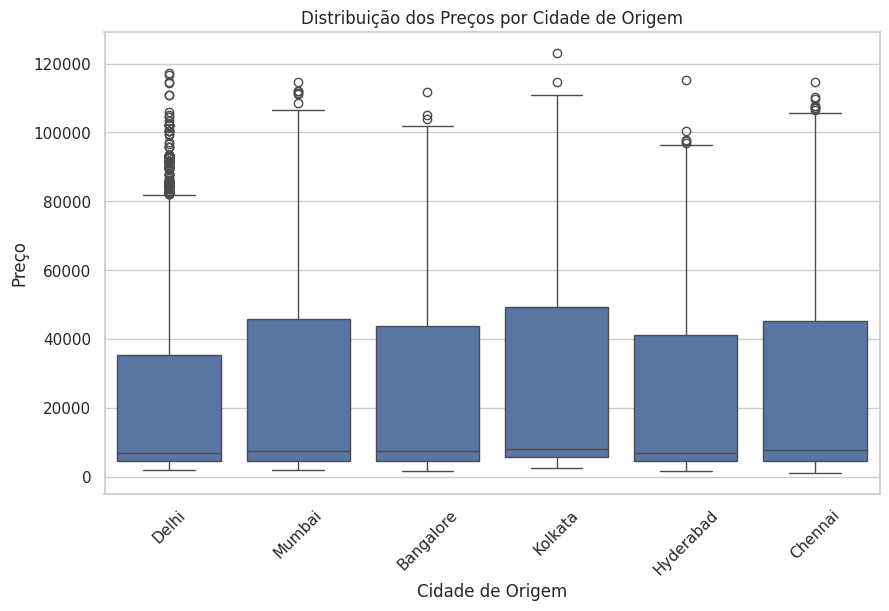

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='source_city', y='price', data=data)
plt.title('Distribuição dos Preços por Cidade de Origem')
plt.xlabel('Cidade de Origem')
plt.ylabel('Preço')
plt.xticks(rotation=45)
plt.show()

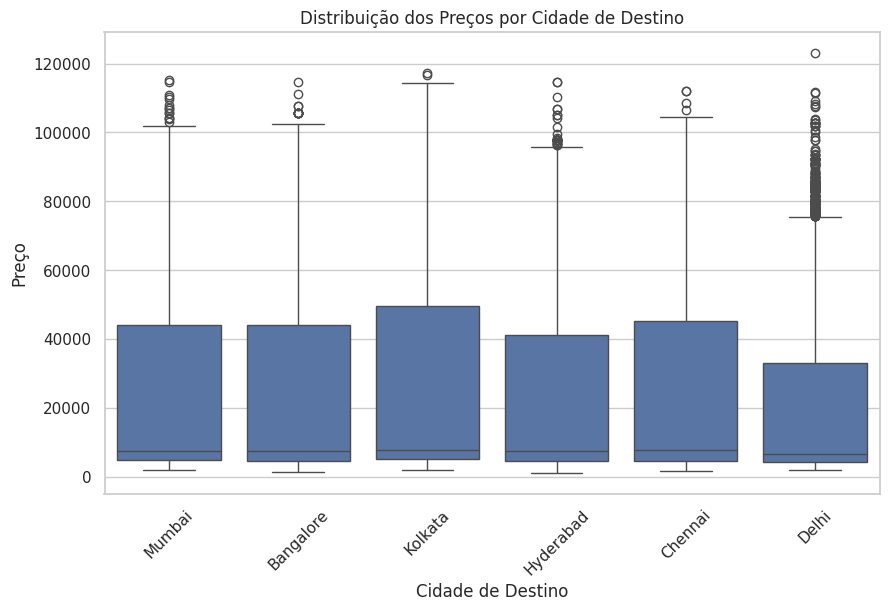

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='destination_city', y='price', data=data)
plt.title('Distribuição dos Preços por Cidade de Destino')
plt.xlabel('Cidade de Destino')
plt.ylabel('Preço')
plt.xticks(rotation=45)
plt.show()

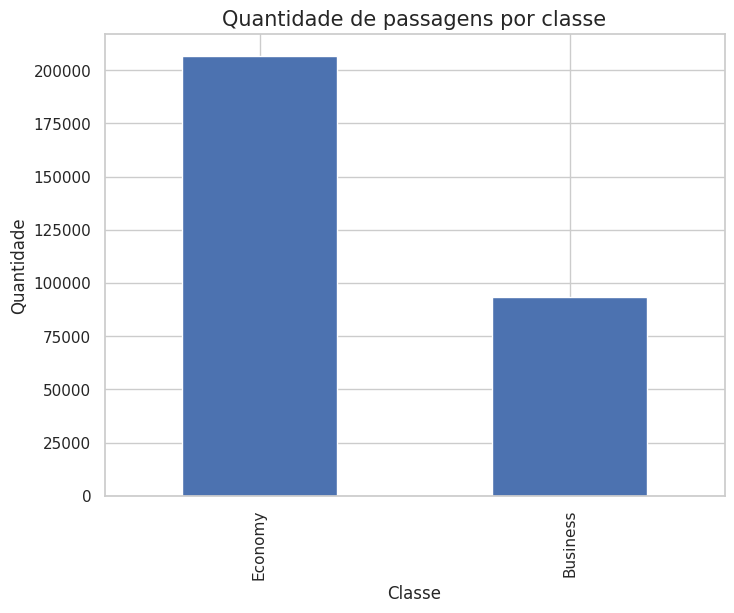

In [47]:
plt.figure(figsize=(8,6))
class_counts = data['class'].value_counts()
class_counts.plot(kind='bar')
plt.title('Quantidade de passagens por classe', fontsize=15)
plt.xlabel('Classe', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(ticks=range(len(class_counts)), labels=class_counts.index)
plt.show()

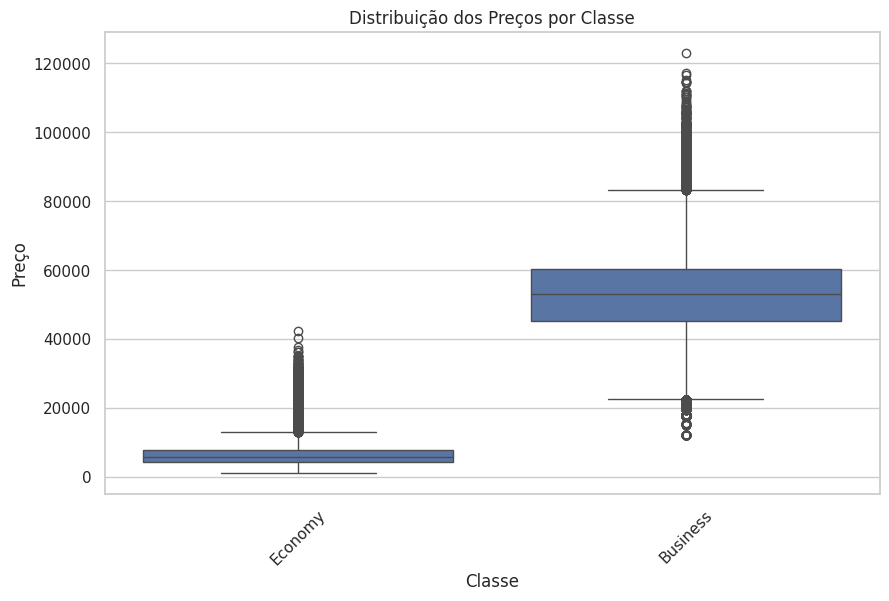

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='price', data=data)
plt.title('Distribuição dos Preços por Classe')
plt.xlabel('Classe')
plt.ylabel('Preço')
plt.xticks(rotation=45)
plt.show()

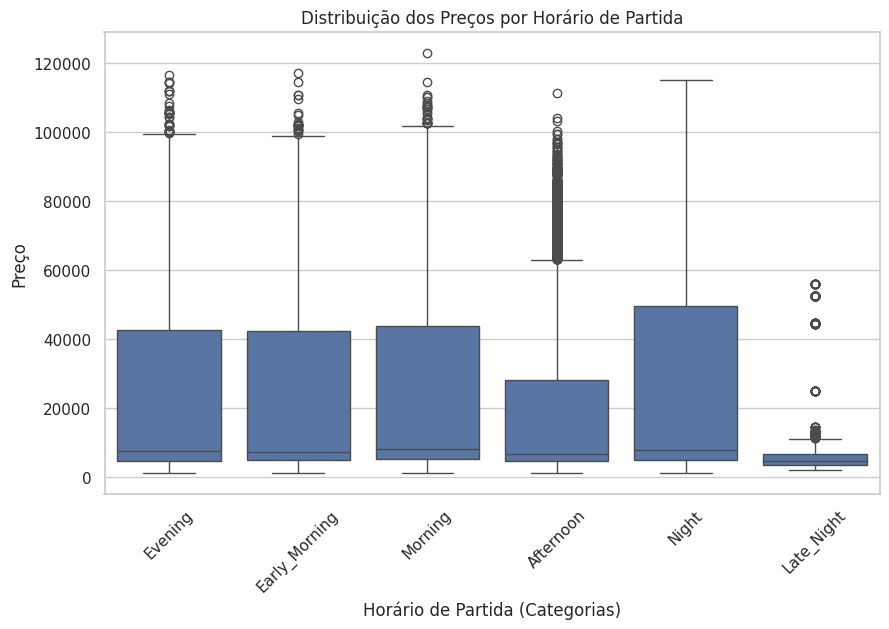

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='departure_time', y='price', data=data)
plt.title('Distribuição dos Preços por Horário de Partida')
plt.xlabel('Horário de Partida (Categorias)')
plt.ylabel('Preço')
plt.xticks(rotation=45)
plt.show()

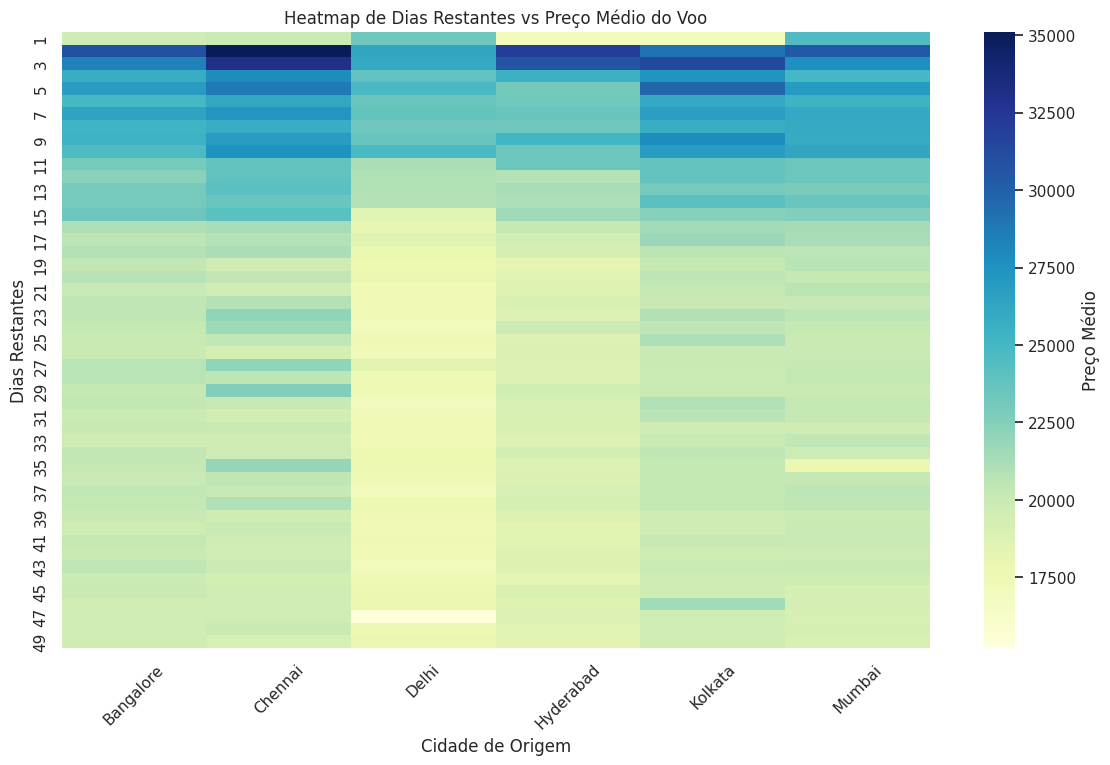

In [50]:
heatmap_dias = pd.pivot_table(data, values='price', index='days_left', columns='source_city', aggfunc='mean')

# Plotando o heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_dias, cmap='YlGnBu', cbar_kws={'label': 'Preço Médio'})
plt.title('Heatmap de Dias Restantes vs Preço Médio do Voo')
plt.xlabel('Cidade de Origem')
plt.ylabel('Dias Restantes')
plt.xticks(rotation=45)
plt.show()

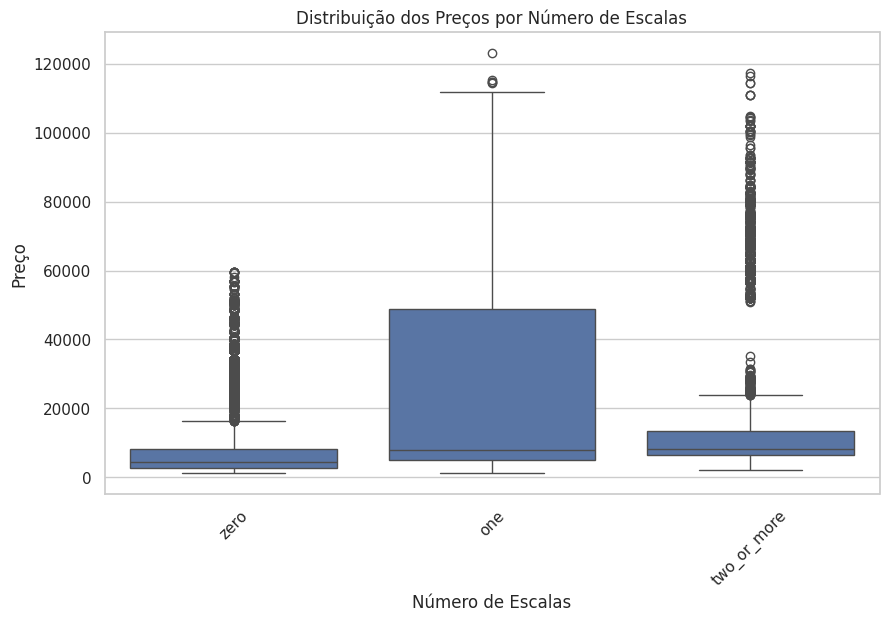

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='stops', y='price', data=data)
plt.title('Distribuição dos Preços por Número de Escalas')
plt.xlabel('Número de Escalas')
plt.ylabel('Preço')
plt.xticks(rotation=45)
plt.show()

<ipython-input-52-c70b2a1ee147>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='departure_time', y='price', data=data, palette='hls', order=time_order)
<ipython-input-52-c70b2a1ee147>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='arrival_time', y='price', data=data, palette='hls', order=time_order)


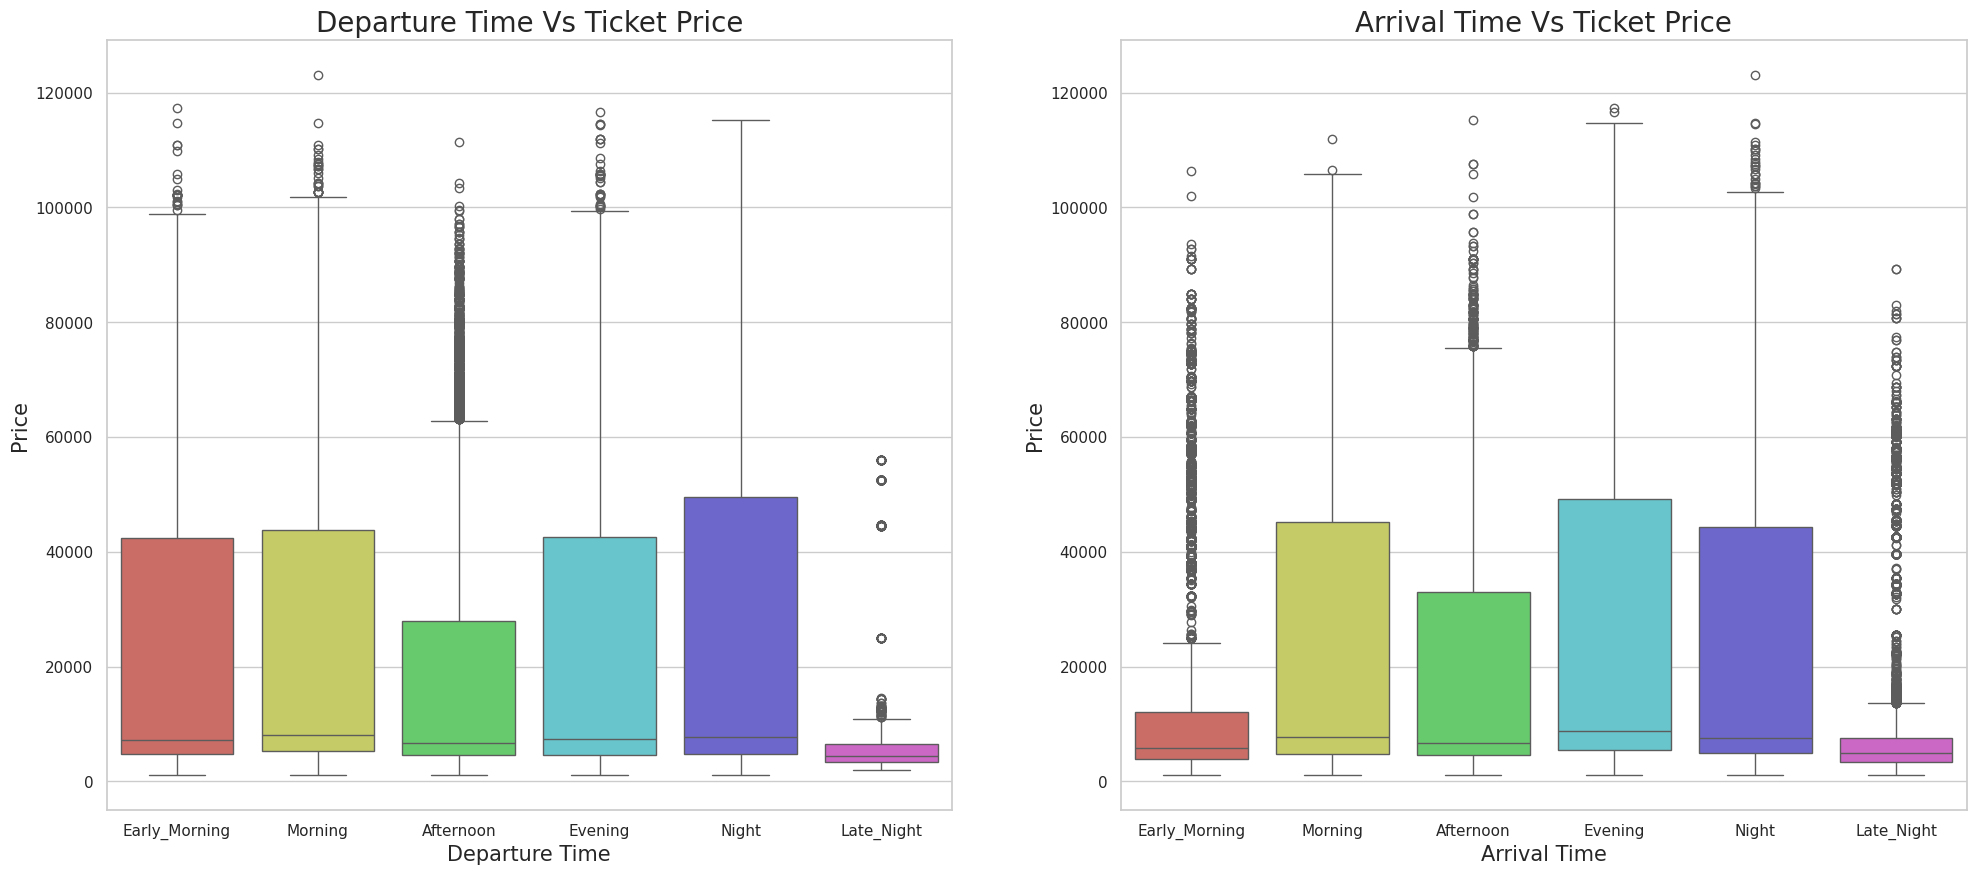

In [52]:
time_order = ['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night']

plt.figure(figsize=(24,10))

plt.subplot(1,2,1)
sns.boxplot(x='departure_time', y='price', data=data, palette='hls', order=time_order)
plt.title('Departure Time Vs Ticket Price', fontsize=20)
plt.xlabel('Departure Time', fontsize=15)
plt.ylabel('Price', fontsize=15)

plt.subplot(1,2,2)
sns.boxplot(x='arrival_time', y='price', data=data, palette='hls', order=time_order)
plt.title('Arrival Time Vs Ticket Price', fontsize=20)
plt.xlabel('Arrival Time', fontsize=15)
plt.ylabel('Price', fontsize=15)

plt.show()

In [53]:
data.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [54]:
# ideia: criar uma feature de route

# Modelagem

In [55]:
numerical_features= ['duration','days_left']

categorical_features = ['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class']

In [56]:
features = ['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left']

target = 'price'

In [57]:
X = data[features]
y = data[target]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
numerical_transformer = Pipeline(steps=[("scaler", StandardScaler())])
categorical_transformer = Pipeline(steps=[("encoder", TargetEncoder())])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ("cat", categorical_transformer, categorical_features)
])

#### Testando diversos modelos

In [59]:
xgb = XGBRegressor()

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model',xgb)
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'days_left']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   TargetEncoder())]),
                                                  ['airline', 'flight',
                                                   'source_city',
                                                   'departure_time', 'stops',
                                                   'arrival_time',
                                                   'destination_city',
                                                   'class'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=No...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [60]:
y_pred = pipe.predict(X_test)

In [61]:
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred)**0.5}")

MAE: 1640.1844529069324
MSE: 8427431.679463947
RMSE: 2903.003906208868


In [62]:
y_test.mean()

20894.0129099965

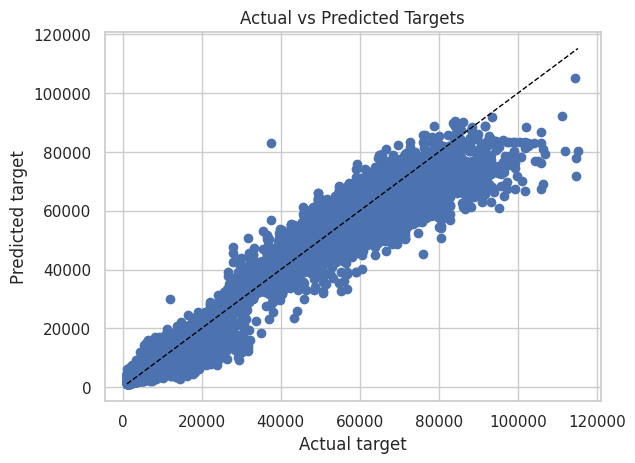

In [63]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='black', linewidth=1)
plt.xlabel('Actual target')
plt.ylabel('Predicted target')
plt.title('XGBoost - Actual vs Predicted Targets')
plt.show()

In [64]:
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
scores

array([-8427718.70574174, -8632599.8413606 , -8448426.41708545,
       -8509572.31158323, -8487656.21552167])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008539 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 591
[LightGBM] [Info] Number of data points in the train set: 240122, number of used features: 10
[LightGBM] [Info] Start training from score 20888.572417
MAE: 1947.3033436045325
MSE: 11142814.618265009
RMSE: 3338.085471983156


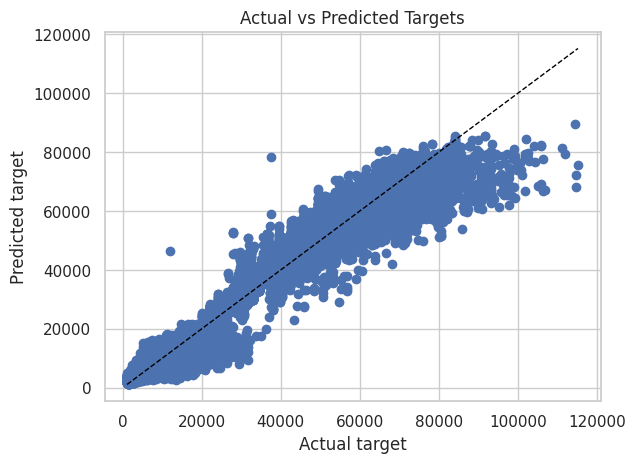

In [65]:
# LightGBM

from lightgbm import LGBMRegressor
lgb = LGBMRegressor()
pipe_lgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', lgb)
])
pipe_lgb.fit(X_train, y_train)

y_pred = pipe_lgb.predict(X_test)

print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred)**0.5}")

y_test.mean()

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='black', linewidth=1)
plt.xlabel('Actual target')
plt.ylabel('Predicted target')
plt.title('LightGBM - Actual vs Predicted Targets')
plt.show()

MAE: 1659.4369398293707
MSE: 8930619.693570463
RMSE: 2988.414243971284


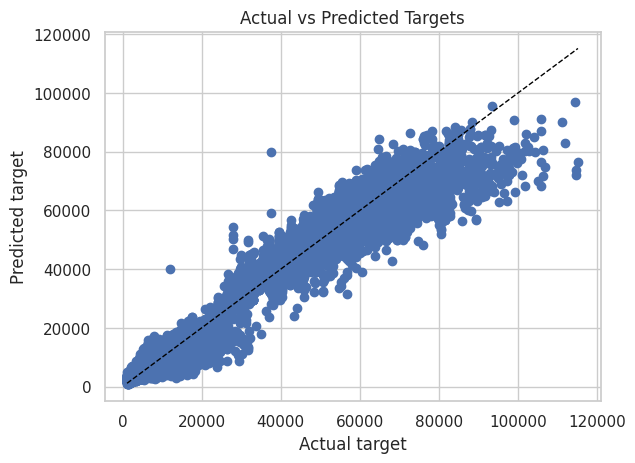

In [66]:
# Catboost

cat = CatBoostRegressor(silent=True)
pipe_cat = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', cat)
])
pipe_cat.fit(X_train, y_train)

y_pred = pipe_cat.predict(X_test)

print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred)**0.5}")

y_test.mean()

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='black', linewidth=1)
plt.xlabel('Actual target')
plt.ylabel('Predicted target')
plt.title('Catboost - Actual vs Predicted Targets')
plt.show()

MAE: 4615.868526473643
MSE: 48475282.10544916
RMSE: 6962.419271018455


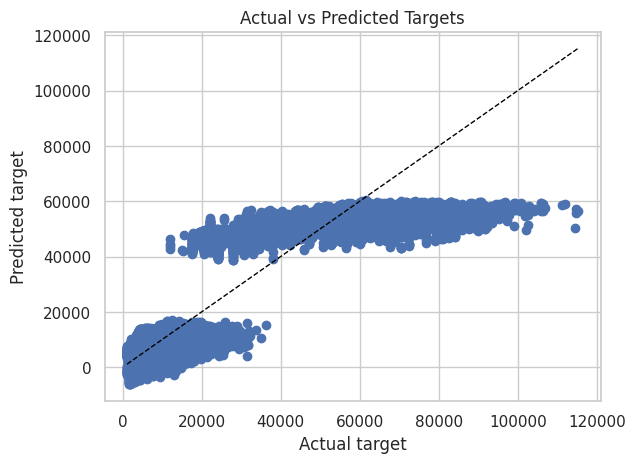

In [67]:
# Regressão Ridge

from sklearn.linear_model import Ridge
ridge = Ridge()
pipe_ridge = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', ridge)
])
pipe_ridge.fit(X_train, y_train)

y_pred = pipe_ridge.predict(X_test)

print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred)**0.5}")

y_test.mean()

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='black', linewidth=1)
plt.xlabel('Actual target')
plt.ylabel('Predicted target')
plt.title('Actual vs Predicted Targets')
plt.show()

#### Resultados com cross-validation

In [68]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse)

def evaluate_model(pipe, X, y):
    cv_scores = cross_val_score(pipe, X, y, cv=5, scoring=rmse_scorer)
    return cv_scores.mean(), cv_scores.std()

results = {}

# XGBoost
results['XGBoost'] = evaluate_model(pipe, X_train, y_train)

# LightGBM
results['LightGBM'] = evaluate_model(pipe_lgb, X_train, y_train)

# CatBoost
results['CatBoost'] = evaluate_model(pipe_cat, X_train, y_train)

# Ridge
results['Ridge'] = evaluate_model(pipe_ridge, X_train, y_train)

results_df = pd.DataFrame(results, index=['Mean RMSE', 'Std RMSE']).T
print("\nResultados dos Modelos:")
print(results_df)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 593
[LightGBM] [Info] Number of data points in the train set: 192097, number of used features: 10
[LightGBM] [Info] Start training from score 20892.155041
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038434 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 192097, number of used features: 10
[LightGBM] [Info] Start training from score 20873.140413
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] 